<a href="https://colab.research.google.com/github/harry567566/DonkeyKong/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 54.03046417236328
Epoch 10 Loss 47.323795318603516
Epoch 20 Loss 41.86256408691406
Epoch 30 Loss 36.6973762512207
Epoch 40 Loss 30.617542266845703
Epoch 50 Loss 25.278823852539062
Epoch 60 Loss 21.090089797973633
Epoch 70 Loss 17.851530075073242
Epoch 80 Loss 15.21353816986084
Epoch 90 Loss 12.975547790527344
Epoch 100 Loss 11.037047386169434
Epoch 110 Loss 9.365915298461914
Epoch 120 Loss 7.950370788574219
Epoch 130 Loss 6.784977436065674
Epoch 140 Loss 5.8592963218688965
Epoch 150 Loss 5.143901824951172
Epoch 160 Loss 4.569737434387207
Epoch 170 Loss 4.065946102142334
Epoch 180 Loss 3.586798906326294
Epoch 190 Loss 3.127912998199463


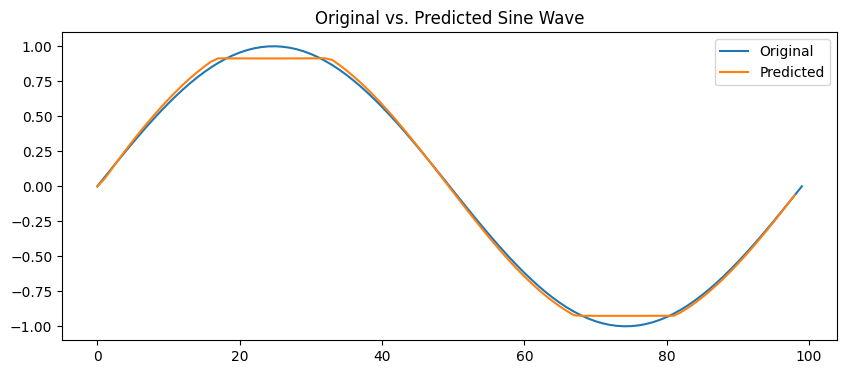

In [1]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt

def generate_sine_wave(seq_len, num_sequences):
    x = np.linspace(0, 2 * np.pi, seq_len)
    y = np.sin(x)
    return torch.tensor(y).float().view(-1, 1).repeat(1, num_sequences).unsqueeze(0)

class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
seq_len = 100
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = generate_sine_wave(seq_len, num_sequences)

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t]
        y_true = data[:, t + 1]
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')

test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t]
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])

plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Sine Wave')
plt.plot(data.numpy().ravel(), label='Original')
plt.plot(test_output, label='Predicted')
plt.legend()
plt.show()

In [7]:
from google.colab import files
uploaded = files.upload()

Saving November-03-2023-Nov 6.csv to November-03-2023-Nov 6.csv


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 3.4541895389556885
Epoch 10 Loss 2.880314826965332
Epoch 20 Loss 2.208559274673462
Epoch 30 Loss 1.6158779859542847
Epoch 40 Loss 1.184297800064087
Epoch 50 Loss 0.8963518738746643
Epoch 60 Loss 0.6547238230705261
Epoch 70 Loss 0.4506814181804657
Epoch 80 Loss 0.3192649483680725
Epoch 90 Loss 0.2651856243610382
Epoch 100 Loss 0.2479458898305893
Epoch 110 Loss 0.23885653913021088
Epoch 120 Loss 0.23405499756336212
Epoch 130 Loss 0.23031987249851227
Epoch 140 Loss 0.22684627771377563
Epoch 150 Loss 0.22370555996894836
Epoch 160 Loss 0.22092854976654053
Epoch 170 Loss 0.21842466294765472
Epoch 180 Loss 0.21614068746566772
Epoch 190 Loss 0.21404443681240082


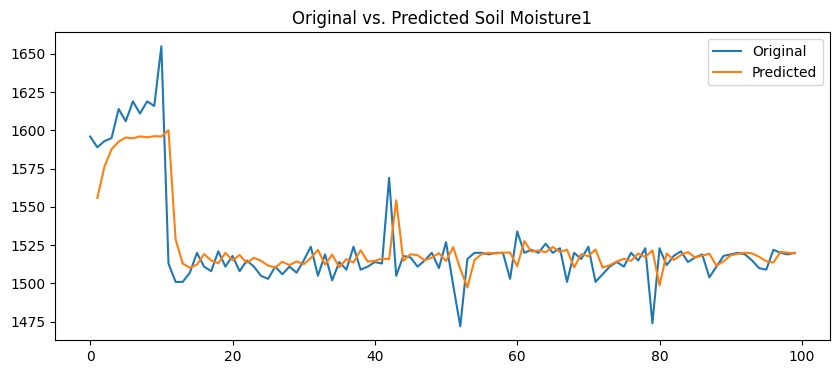

In [16]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-13-2023-19-20-46.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 7.902746200561523
Epoch 10 Loss 6.901761531829834
Epoch 20 Loss 4.929737091064453
Epoch 30 Loss 3.33156681060791
Epoch 40 Loss 2.185421943664551
Epoch 50 Loss 1.3840011358261108
Epoch 60 Loss 0.8117914199829102
Epoch 70 Loss 0.43122953176498413
Epoch 80 Loss 0.22126531600952148
Epoch 90 Loss 0.11283445358276367
Epoch 100 Loss 0.06851337850093842
Epoch 110 Loss 0.055559299886226654
Epoch 120 Loss 0.05093403905630112
Epoch 130 Loss 0.04649466276168823
Epoch 140 Loss 0.042494773864746094
Epoch 150 Loss 0.03916150704026222
Epoch 160 Loss 0.03631603345274925
Epoch 170 Loss 0.034062426537275314
Epoch 180 Loss 0.032205745577812195
Epoch 190 Loss 0.030473748221993446


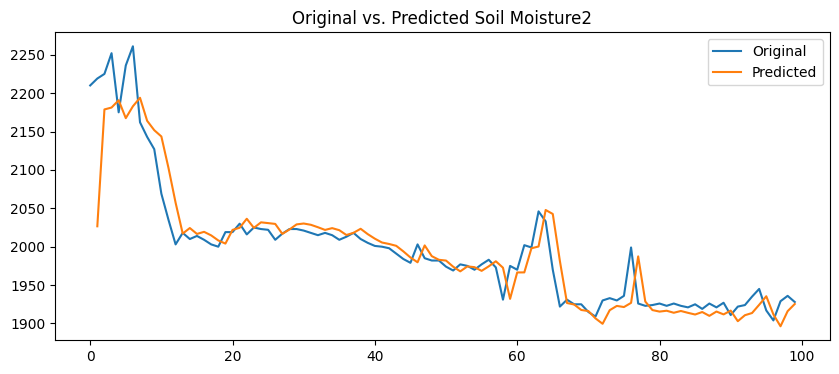

In [17]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-13-2023-19-20-46.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 18.127334594726562
Epoch 10 Loss 13.326512336730957
Epoch 20 Loss 9.846390724182129
Epoch 30 Loss 7.40667724609375
Epoch 40 Loss 5.573700428009033
Epoch 50 Loss 4.260165691375732
Epoch 60 Loss 3.3422882556915283
Epoch 70 Loss 2.6659657955169678
Epoch 80 Loss 2.1072380542755127
Epoch 90 Loss 1.5863808393478394
Epoch 100 Loss 1.1082018613815308
Epoch 110 Loss 0.7173165678977966
Epoch 120 Loss 0.44471240043640137
Epoch 130 Loss 0.2933987081050873
Epoch 140 Loss 0.2346232682466507
Epoch 150 Loss 0.22272978723049164
Epoch 160 Loss 0.22311149537563324
Epoch 170 Loss 0.2232673317193985
Epoch 180 Loss 0.22264865040779114
Epoch 190 Loss 0.2222503423690796


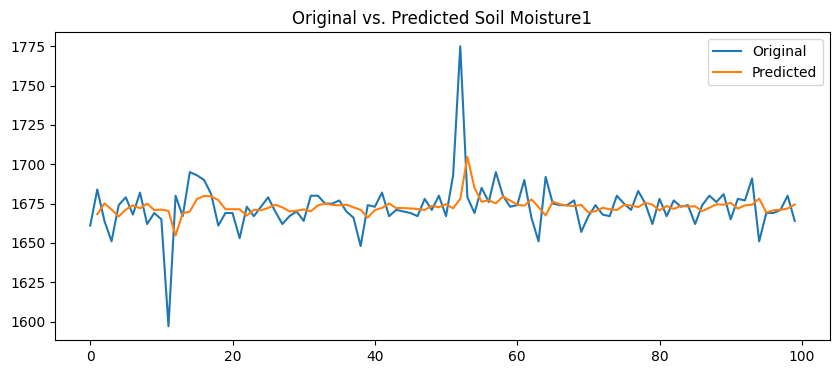

In [18]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-20-2023-12-44-24.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 19.602476119995117
Epoch 10 Loss 18.666688919067383
Epoch 20 Loss 14.64927864074707
Epoch 30 Loss 10.268482208251953
Epoch 40 Loss 6.6725568771362305
Epoch 50 Loss 4.040680885314941
Epoch 60 Loss 2.565574884414673
Epoch 70 Loss 1.6614211797714233
Epoch 80 Loss 1.0723412036895752
Epoch 90 Loss 0.6776955723762512
Epoch 100 Loss 0.3979780972003937
Epoch 110 Loss 0.1956522911787033
Epoch 120 Loss 0.07043338567018509
Epoch 130 Loss 0.016976874321699142
Epoch 140 Loss 0.004717973992228508
Epoch 150 Loss 0.0045970045030117035
Epoch 160 Loss 0.0048511577770113945
Epoch 170 Loss 0.004443948622792959
Epoch 180 Loss 0.004147326573729515
Epoch 190 Loss 0.004073430318385363


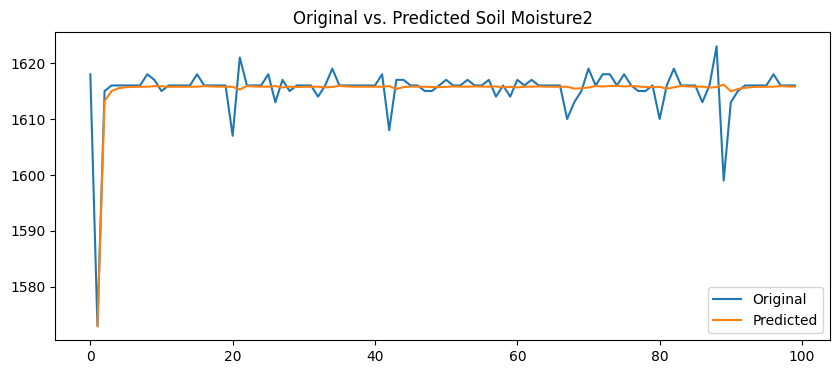

In [19]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-20-2023-12-44-24.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 17.267929077148438
Epoch 10 Loss 10.586758613586426
Epoch 20 Loss 7.010589599609375
Epoch 30 Loss 4.580566883087158
Epoch 40 Loss 3.103475332260132
Epoch 50 Loss 1.983366847038269
Epoch 60 Loss 1.0443472862243652
Epoch 70 Loss 0.4233337938785553
Epoch 80 Loss 0.14727650582790375
Epoch 90 Loss 0.08622362464666367
Epoch 100 Loss 0.08735816180706024
Epoch 110 Loss 0.0868833065032959
Epoch 120 Loss 0.08376476168632507
Epoch 130 Loss 0.0825987309217453
Epoch 140 Loss 0.0824906975030899
Epoch 150 Loss 0.08244793862104416
Epoch 160 Loss 0.08239981532096863
Epoch 170 Loss 0.0823865681886673
Epoch 180 Loss 0.08238228410482407
Epoch 190 Loss 0.08237718790769577


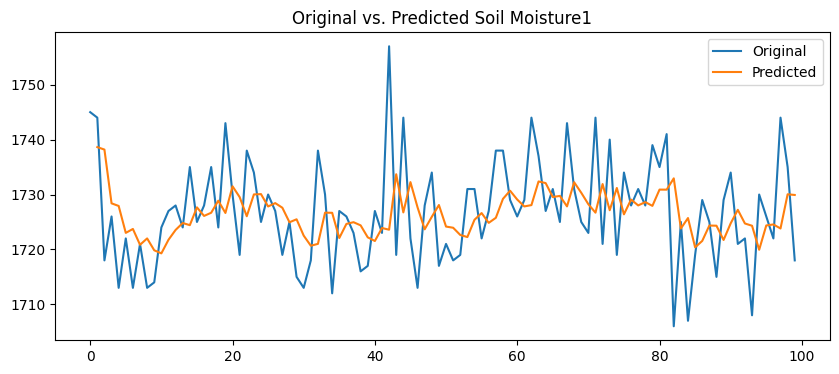

In [20]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-24-2023-18-00-12.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 13.49524211883545
Epoch 10 Loss 10.263731002807617
Epoch 20 Loss 7.083934307098389
Epoch 30 Loss 4.730680465698242
Epoch 40 Loss 3.1688361167907715
Epoch 50 Loss 2.0487864017486572
Epoch 60 Loss 1.2035735845565796
Epoch 70 Loss 0.6342886090278625
Epoch 80 Loss 0.3158456087112427
Epoch 90 Loss 0.1652345210313797
Epoch 100 Loss 0.09381444752216339
Epoch 110 Loss 0.059457067400217056
Epoch 120 Loss 0.046884533017873764
Epoch 130 Loss 0.0444362498819828
Epoch 140 Loss 0.044454120099544525
Epoch 150 Loss 0.04446927458047867
Epoch 160 Loss 0.04436812177300453
Epoch 170 Loss 0.04429597407579422
Epoch 180 Loss 0.04426838457584381
Epoch 190 Loss 0.04425913095474243


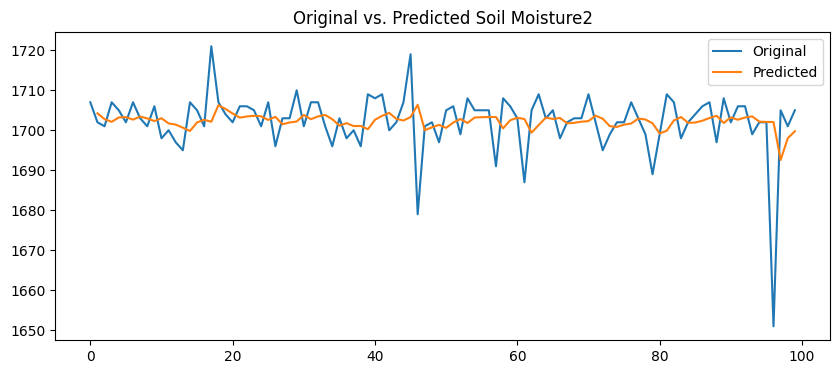

In [21]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-24-2023-18-00-12.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 33.949344635009766
Epoch 10 Loss 32.29671859741211
Epoch 20 Loss 22.535669326782227
Epoch 30 Loss 14.713388442993164
Epoch 40 Loss 9.905302047729492
Epoch 50 Loss 6.917673587799072
Epoch 60 Loss 4.574352741241455
Epoch 70 Loss 2.72424054145813
Epoch 80 Loss 1.4192343950271606
Epoch 90 Loss 0.6106100678443909
Epoch 100 Loss 0.2281041294336319
Epoch 110 Loss 0.11924882233142853
Epoch 120 Loss 0.11001399159431458
Epoch 130 Loss 0.1114589124917984
Epoch 140 Loss 0.1090158149600029
Epoch 150 Loss 0.10698208212852478
Epoch 160 Loss 0.10643802583217621
Epoch 170 Loss 0.1064148023724556
Epoch 180 Loss 0.10639777034521103
Epoch 190 Loss 0.10636075586080551


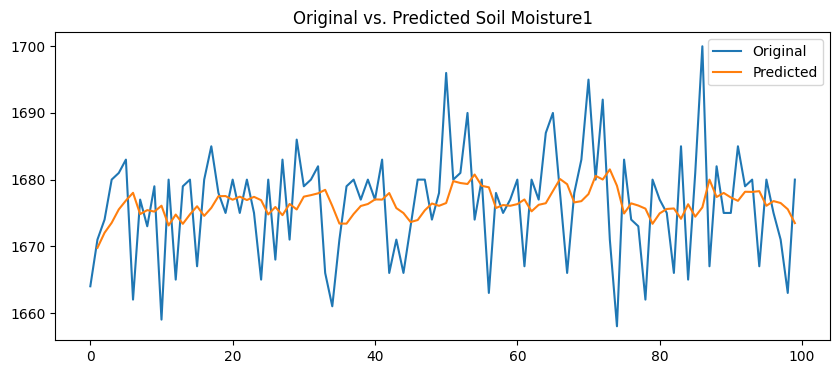

In [22]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-26-2023-18-47-14.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 54.911842346191406
Epoch 10 Loss 49.977867126464844
Epoch 20 Loss 46.259864807128906
Epoch 30 Loss 32.594085693359375
Epoch 40 Loss 21.914051055908203
Epoch 50 Loss 13.533350944519043
Epoch 60 Loss 7.252216815948486
Epoch 70 Loss 3.132845640182495
Epoch 80 Loss 1.0281014442443848
Epoch 90 Loss 0.28623226284980774
Epoch 100 Loss 0.1366170197725296
Epoch 110 Loss 0.11822839081287384
Epoch 120 Loss 0.104978047311306
Epoch 130 Loss 0.09671416878700256
Epoch 140 Loss 0.0944075956940651
Epoch 150 Loss 0.09377007186412811
Epoch 160 Loss 0.09339064359664917
Epoch 170 Loss 0.09325842559337616
Epoch 180 Loss 0.09324133396148682
Epoch 190 Loss 0.09322118014097214


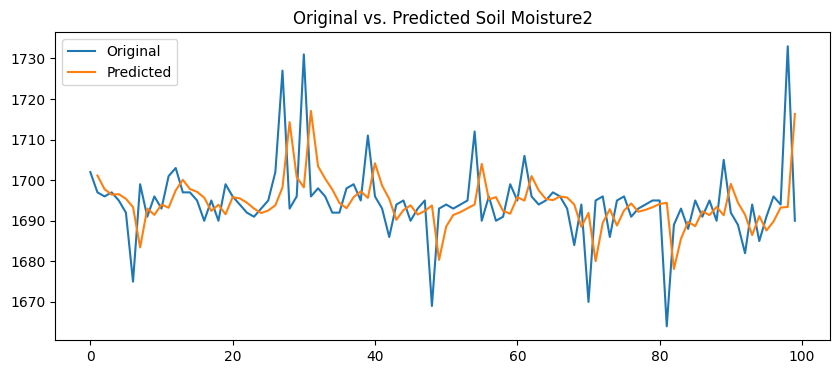

In [23]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-26-2023-18-47-14.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 11.238890647888184
Epoch 10 Loss 10.74213981628418
Epoch 20 Loss 9.475674629211426
Epoch 30 Loss 6.394952774047852
Epoch 40 Loss 3.857680082321167
Epoch 50 Loss 2.4699928760528564
Epoch 60 Loss 1.7737727165222168
Epoch 70 Loss 1.3120025396347046
Epoch 80 Loss 0.9123094081878662
Epoch 90 Loss 0.6007668375968933
Epoch 100 Loss 0.39110422134399414
Epoch 110 Loss 0.2625182867050171
Epoch 120 Loss 0.16828200221061707
Epoch 130 Loss 0.11774812638759613
Epoch 140 Loss 0.09930574148893356
Epoch 150 Loss 0.09513343870639801
Epoch 160 Loss 0.09453935921192169
Epoch 170 Loss 0.0940624549984932
Epoch 180 Loss 0.09352206438779831
Epoch 190 Loss 0.09313911944627762


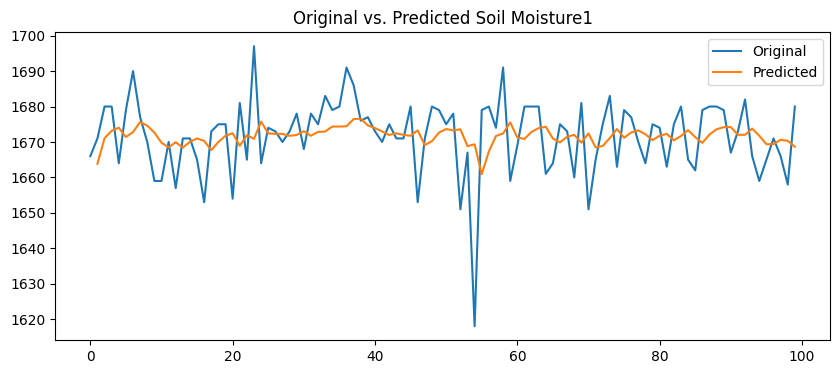

In [24]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-27-2023-19-02-04.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 8.810628890991211
Epoch 10 Loss 8.03010368347168
Epoch 20 Loss 6.741657733917236
Epoch 30 Loss 4.952970504760742
Epoch 40 Loss 3.1534245014190674
Epoch 50 Loss 1.6042594909667969
Epoch 60 Loss 0.8179425597190857
Epoch 70 Loss 0.4180033802986145
Epoch 80 Loss 0.1910884976387024
Epoch 90 Loss 0.10292937606573105
Epoch 100 Loss 0.0810161828994751
Epoch 110 Loss 0.07905104011297226
Epoch 120 Loss 0.07588930428028107
Epoch 130 Loss 0.07381254434585571
Epoch 140 Loss 0.07335064560174942
Epoch 150 Loss 0.07307571172714233
Epoch 160 Loss 0.07290448993444443
Epoch 170 Loss 0.07282619178295135
Epoch 180 Loss 0.07279239594936371
Epoch 190 Loss 0.0727698877453804


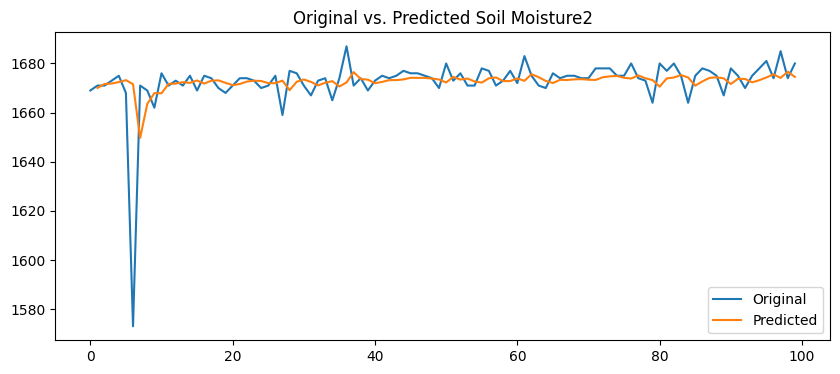

In [25]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('October-27-2023-19-02-04.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 44.22359085083008
Epoch 10 Loss 25.152103424072266
Epoch 20 Loss 15.490315437316895
Epoch 30 Loss 9.536416053771973
Epoch 40 Loss 6.399294853210449
Epoch 50 Loss 4.835570335388184
Epoch 60 Loss 4.014232158660889
Epoch 70 Loss 3.373236656188965
Epoch 80 Loss 2.6923813819885254
Epoch 90 Loss 1.981257677078247
Epoch 100 Loss 1.3137179613113403
Epoch 110 Loss 0.775619387626648
Epoch 120 Loss 0.42394381761550903
Epoch 130 Loss 0.2501586079597473
Epoch 140 Loss 0.1916525512933731
Epoch 150 Loss 0.1814478039741516
Epoch 160 Loss 0.18193142116069794
Epoch 170 Loss 0.18209503591060638
Epoch 180 Loss 0.1815524399280548
Epoch 190 Loss 0.18113639950752258


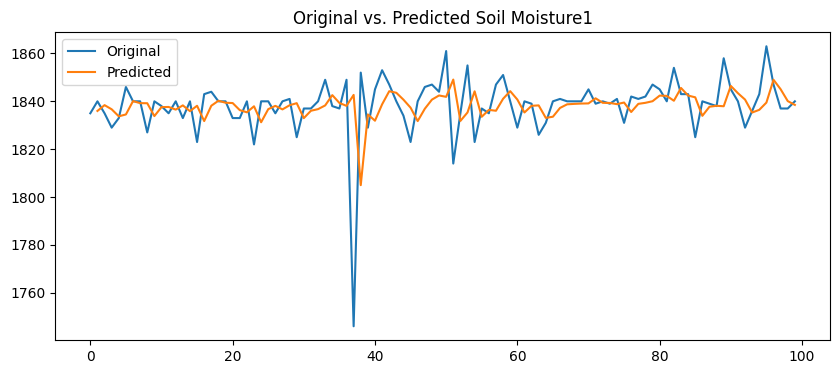

In [26]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('November-03-2023-Nov 6.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 1'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture1')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 53.88495635986328
Epoch 10 Loss 43.99281692504883
Epoch 20 Loss 33.197967529296875
Epoch 30 Loss 24.150487899780273
Epoch 40 Loss 16.663536071777344
Epoch 50 Loss 11.123587608337402
Epoch 60 Loss 7.557192325592041
Epoch 70 Loss 5.572049617767334
Epoch 80 Loss 4.554571151733398
Epoch 90 Loss 3.937983989715576
Epoch 100 Loss 3.3828580379486084
Epoch 110 Loss 2.7817256450653076
Epoch 120 Loss 2.149012804031372
Epoch 130 Loss 1.5286234617233276
Epoch 140 Loss 0.9762723445892334
Epoch 150 Loss 0.5482152700424194
Epoch 160 Loss 0.2722204923629761
Epoch 170 Loss 0.13075213134288788
Epoch 180 Loss 0.07635163515806198
Epoch 190 Loss 0.06231670454144478


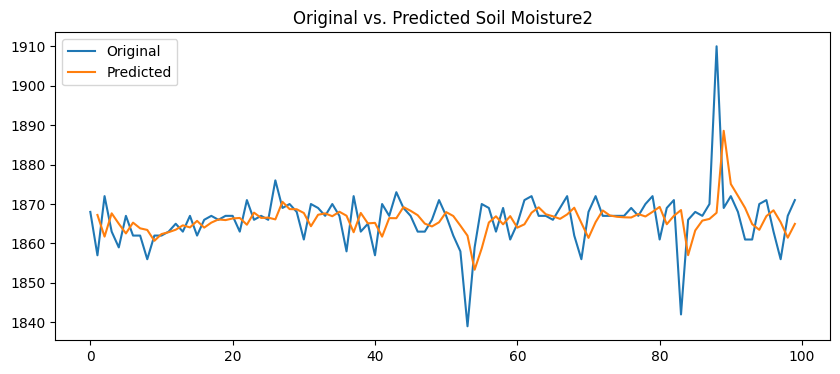

In [27]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('November-03-2023-Nov 6.csv')

data.columns = data.columns.str.strip()

moisture_pot = data['Moisture Pot 2'].values.astype(float)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
moisture_data = scaler.fit_transform(moisture_pot.reshape(-1, 1)).flatten()


seq_len = 100
moisture_data = moisture_data[:seq_len]


data_tensor = torch.tensor(moisture_data).float().unsqueeze(0)


class mLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, mem_dim):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.mem_dim = mem_dim
        self.Wq = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bq = nn.Parameter(torch.randn(hidden_size, 1))
        self.Wk = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bk = nn.Parameter(torch.randn(mem_dim, 1))
        self.Wv = nn.Parameter(torch.randn(mem_dim, input_size))
        self.bv = nn.Parameter(torch.randn(mem_dim, 1))
        self.wi = nn.Parameter(torch.randn(1, input_size))
        self.bi = nn.Parameter(torch.randn(1))
        self.wf = nn.Parameter(torch.randn(1, input_size))
        self.bf = nn.Parameter(torch.randn(1))
        self.Wo = nn.Parameter(torch.randn(hidden_size, input_size))
        self.bo = nn.Parameter(torch.randn(hidden_size, 1))
        self.reset_parameters()

    def reset_parameters(self):
        for p in self.parameters():
            if p.data.ndimension() >= 2:
                nn.init.xavier_uniform_(p.data)
            else:
                nn.init.zeros_(p.data)

    def forward(self, x, states):
        (C_prev, n_prev) = states
        qt = torch.matmul(self.Wq, x) + self.bq
        kt = (1 / math.sqrt(self.mem_dim)) * (torch.matmul(self.Wk, x) + self.bk)
        vt = torch.matmul(self.Wv, x) + self.bv

        it = torch.exp(torch.matmul(self.wi, x) + self.bi)
        ft = torch.sigmoid(torch.matmul(self.wf, x) + self.bf)

        vt = vt.squeeze()
        kt = kt.squeeze()

        C = ft * C_prev + it * torch.ger(vt, kt)
        n = ft * n_prev + it * kt.unsqueeze(1)

        max_nqt = torch.max(torch.abs(torch.matmul(n.T, qt)), torch.tensor(1.0))
        h_tilde = torch.matmul(C, qt) / max_nqt
        ot = torch.sigmoid(torch.matmul(self.Wo, x) + self.bo)
        ht = ot * h_tilde

        return ht, (C, n)

    def init_hidden(self):
        return (torch.zeros(self.mem_dim, self.mem_dim),
                torch.zeros(self.mem_dim, 1))

input_size = 1
hidden_size = 10
mem_dim = 10
num_sequences = 1

model = mLSTM(input_size, hidden_size, mem_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

data = data_tensor

for epoch in range(200):
    states = model.init_hidden()
    optimizer.zero_grad()
    loss = 0
    for t in range(seq_len - 1):
        x = data[:, t].unsqueeze(1)
        y_true = data[:, t + 1].unsqueeze(1)
        y_pred, states = model(x, states)
        loss += criterion(y_pred, y_true)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


test_output = []
states = model.init_hidden()
for t in range(seq_len - 1):
    x = data[:, t].unsqueeze(1)
    y_pred, states = model(x, states)
    test_output.append(y_pred.detach().numpy().ravel()[0])


original_data = scaler.inverse_transform(data.numpy().reshape(-1, 1)).flatten()
predicted_data = scaler.inverse_transform(np.array(test_output).reshape(-1, 1)).flatten()


plt.figure(figsize=(10, 4))
plt.title('Original vs. Predicted Soil Moisture2')
plt.plot(original_data, label='Original')
plt.plot(np.arange(1, len(predicted_data) + 1), predicted_data, label='Predicted')
plt.legend()
plt.show()